In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd

import pandas_profiling

## Задание
### 1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени - да, цена зависит от времении т.к. с течением веремени изменяются факторы вляющие на нее (инфляция, спрос, сезоность, и т.д.),

б) скорость полета самолета при перелете из аэропорта А в аэропорт В - да скорсть мерятся как растояние на время,

в) количество отказов компьютера - нет ,

г) число обращений в поликлинику по району - да (Сезонность, временной интервал в течении дня),

д) координаты автобуса при движении по маршруту - да т.к есть изменение скорости + соблюдение графика,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы - нет, небудет как такавой зависимости (отсудствие плановых действий).

### 2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('data/DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Text(0, 0.5, 'МВт')

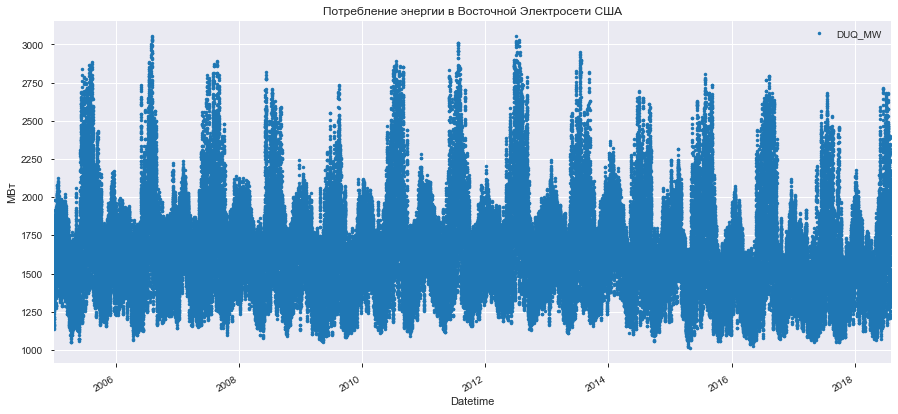

In [6]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'Потребление энергии в Восточной Электросети США' )
plt.ylabel ( 'МВт' )

In [7]:
data['date'] = data.index
data_2014 = data.loc[np.logical_and( np.logical_and( data['date'].dt.year == 2014 ,\
                                                    data['date'].dt.month == 9), data['date'].dt.day < 10  )]

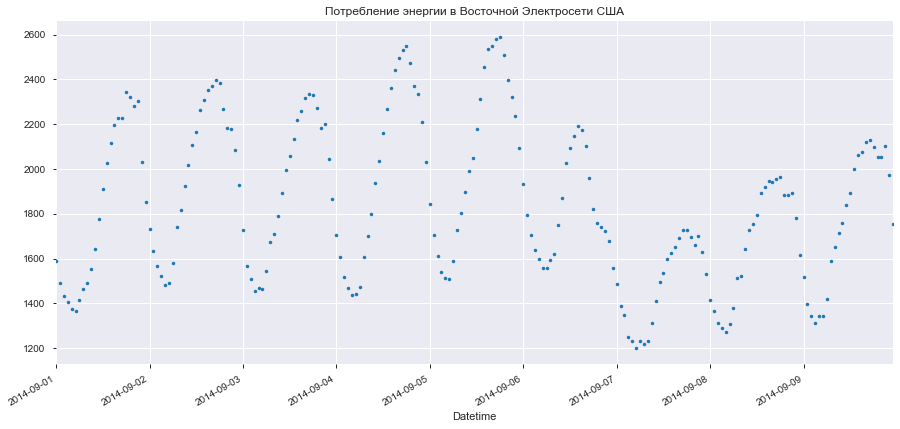

In [8]:
_ = data_2014['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='Потребление энергии в Восточной Электросети США' )

In [ ]:
pandas_profiling.ProfileReport(data)

In [31]:
count_data = data['date'].value_counts()
count_data[count_data==2]

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
Name: date, dtype: int64

In [40]:
data_time_h = pd.date_range(data.index.min(), data.index.max(), freq="H")
set(data_time_h) - set(data.index.unique())

{Timestamp('2005-04-03 03:00:00', freq='H'),
 Timestamp('2005-10-30 02:00:00', freq='H'),
 Timestamp('2006-04-02 03:00:00', freq='H'),
 Timestamp('2006-10-29 02:00:00', freq='H'),
 Timestamp('2007-03-11 03:00:00', freq='H'),
 Timestamp('2007-11-04 02:00:00', freq='H'),
 Timestamp('2008-03-09 03:00:00', freq='H'),
 Timestamp('2008-11-02 02:00:00', freq='H'),
 Timestamp('2009-03-08 03:00:00', freq='H'),
 Timestamp('2009-11-01 02:00:00', freq='H'),
 Timestamp('2010-03-14 03:00:00', freq='H'),
 Timestamp('2010-11-07 02:00:00', freq='H'),
 Timestamp('2010-12-10 00:00:00', freq='H'),
 Timestamp('2011-03-13 03:00:00', freq='H'),
 Timestamp('2011-11-06 02:00:00', freq='H'),
 Timestamp('2012-03-11 03:00:00', freq='H'),
 Timestamp('2012-11-04 02:00:00', freq='H'),
 Timestamp('2013-03-10 03:00:00', freq='H'),
 Timestamp('2013-11-03 02:00:00', freq='H'),
 Timestamp('2014-03-09 03:00:00', freq='H'),
 Timestamp('2015-03-08 03:00:00', freq='H'),
 Timestamp('2016-03-13 03:00:00', freq='H'),
 Timestamp

По итогу выбросов как таковых не наблюдается. Имеем задвоенные даные в 4 случаях и пропуски в 24 случаях

### 3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [42]:
brent_data = pd.read_excel('data/нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [43]:
brent_weekly = brent_data.resample("W").mean()
brent_monthly = brent_data.resample("M").mean()

### 4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

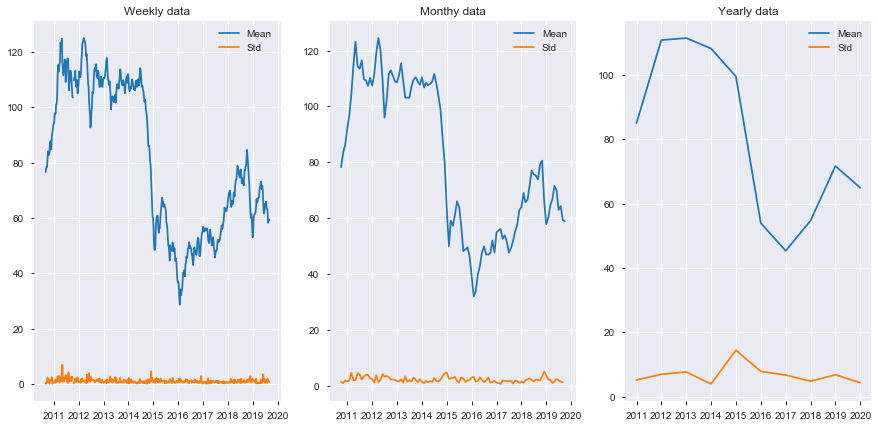

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches (15 , 7)

ax[0].plot(brent_data.resample("W").mean(), label='Mean')
ax[0].plot(brent_data.resample("W").std(), label='Std')
ax[0].set_title('Weekly data')
ax[0].legend()

ax[1].plot(brent_data.resample("M").mean(), label='Mean')
ax[1].plot(brent_data.resample("M").std(), label='Std')
ax[1].set_title('Monthy data')
ax[1].legend()

ax[2].plot(brent_data.resample("Y").mean(), label='Mean')
ax[2].plot(brent_data.resample("Y").std(), label='Std')
ax[2].set_title('Yearly data')
ax[2].legend()

### 5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

In [ ]:
Помогло снизить разброс (шум) и увидеть долгосрочные тренды, который не виден на дневных данных